In [78]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from tueplots import bundles
plt.rcParams.update(bundles.icml2024())
from importlib import reload
import os 
#os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin' #For MacOS

from gradient_approximation import *
from optimizers import *
from sets import *
from utils import *
from run_experiments import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## None-stochastic FW LogReg on L2-ball

In [33]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 0
sett = L2Ball(radius=0.5)
L = 5.25

args = init_experiment(func_name, d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [65]:
def learning_rate(k):
    return 1 / L

In [66]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 369.40it/s]


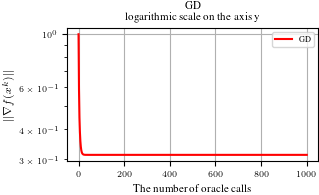

0.4999999999999999


In [77]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [125]:
def learning_rate_jaguar(k):
    return (np.sqrt(k) + 1) / (k + L)

def learning_rate_lame(k):
    return (2 * np.sqrt(k) + 1) / (k + L)

def learning_rate_turtle(k):
    return 1 / (k + L)

In [126]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [129]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

 54%|█████████████████████                  | 2675/4945 [01:16<01:04, 35.13it/s]


Precision 1e-06 achieved at step 2675!


100%|███████████████████████████████████████████| 89/89 [03:58<00:00,  2.68s/it]


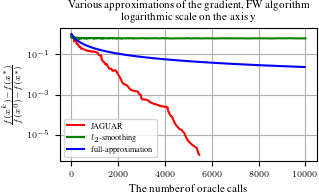

In [131]:
make_err_plot(optimizers_list, save_name="Non_stochastics_FW_LogReg_L2")

## None-stochastic FW Reg on L2-ball

In [152]:
func_name = "quadratic"
d = 112
seed = 42
sigma = 0
sett = L2Ball(radius=0.5)
L = 1000
mu = 1

args = init_experiment(func_name, d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [156]:
def learning_rate(k):
    return 1 / L

In [157]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|████████████████████████████████| 100000/100000 [00:03<00:00, 32921.19it/s]


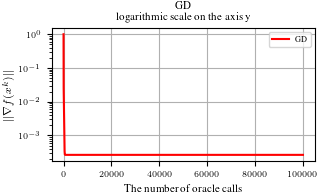

0.49999999999999994


In [158]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [214]:
def learning_rate_jaguar(k):
    return 1 / (k + 1)

def learning_rate_lame(k):
    return 10 / (k + L)

def learning_rate_turtle(k):
    return (2 * np.sqrt(k) + 1) / (k + L)

In [215]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [219]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 892/892 [00:38<00:00, 22.97it/s]


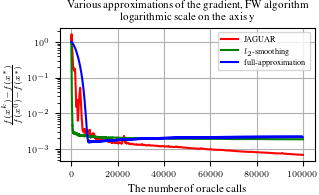

In [220]:
make_err_plot(optimizers_list, save_name="Non_stochastics_FW_Reg_L2")

## None-stochastic GD LogReg on L2-ball

In [221]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 0
sett = L2Ball(radius=0.5)
L = 5.25

args = init_experiment(func_name, d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [222]:
def learning_rate(k):
    return 1 / L

In [223]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 252.47it/s]


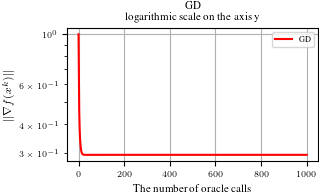

0.4999999999999999


In [224]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [236]:
def learning_rate_jaguar(k):
    return 20 / (k + 1)

def learning_rate_lame(k):
    return (2 * np.sqrt(k) + 1) / (k + L)

def learning_rate_turtle(k):
    return (2 * np.sqrt(k) + 1) / (k + L)

In [237]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [240]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = GDOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

 35%|█████████████▌                         | 1712/4945 [01:23<02:37, 20.53it/s]


Precision 1e-06 achieved at step 1712!


 22%|█████████▋                                 | 20/89 [01:34<05:24,  4.70s/it]

Precision 1e-06 achieved at step 20!


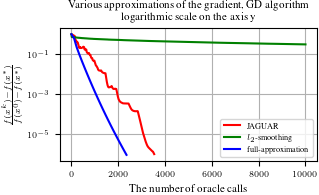

In [242]:
make_err_plot(optimizers_list, save_name="Non_stochastics_GD_LogReg_L2")

## None-stochastic GD Reg on L2-ball

In [331]:
func_name = "quadratic"
d = 112
seed = 101
sigma = 0
sett = L2Ball(radius=0.5)
L = 1000
mu = 1

args = init_experiment(func_name, d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [332]:
def learning_rate(k):
    return 1 / L

In [333]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|████████████████████████████████| 100000/100000 [00:03<00:00, 27901.94it/s]


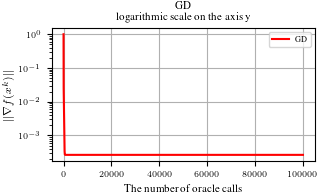

0.49999999999999994


In [334]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [453]:
def learning_rate_jaguar(k):
    return 1 / 63000

def learning_rate_lame(k):
    return (np.sqrt(k) + 1) / (2 * k + L)

def learning_rate_turtle(k):
    return 1 / (k + L)

In [454]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [455]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = GDOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

 63%|█████████████████████▉             | 31363/49945 [00:12<00:07, 2446.72it/s]


Precision 1e-06 achieved at step 31363!


 69%|████████████████████████████▏            | 614/892 [00:26<00:11, 23.51it/s]

Precision 1e-06 achieved at step 614!


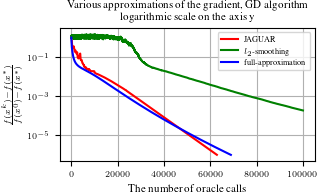

In [457]:
make_err_plot(optimizers_list, save_name="Non_stochastics_GD_Reg_L2")

## Stochastic OPF FW LogReg on L2-ball

In [458]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 1
sett = L2Ball(radius=0.5)
L = 5.25

args = init_experiment(func_name, d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [459]:
def learning_rate(k):
    return 1 / L

In [460]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 246.25it/s]


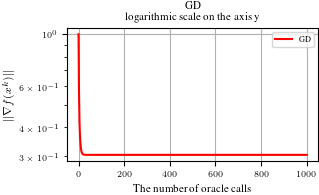

0.49999999999999983


In [461]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [536]:
def learning_rate_jaguar(k):
    return 1 / (k + 10)

def learning_rate_lame(k):
    return (np.sqrt(k) + 1) / (10 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [537]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [538]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [541]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [03:19<00:00,  4.53s/it]


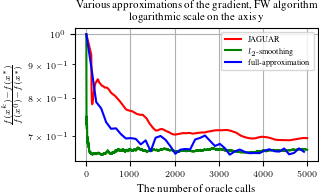

In [542]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_L2")

## Stochastic TPF FW LogReg on L2-ball

In [602]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 1
sett = L2Ball(radius=0.5)
L = 5.25

args = init_experiment(func_name, d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [603]:
def learning_rate(k):
    return 1 / L

In [604]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 309.60it/s]


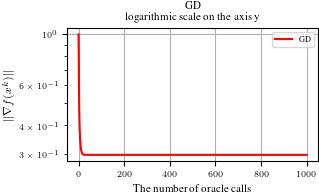

0.4999999999999999


In [605]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [606]:
def learning_rate_jaguar(k):
    return (10 * np.sqrt(k) + 1) / (3 * k + 6)

def learning_rate_lame(k):
    return (10 * np.sqrt(k) + 1) / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [607]:
def momentum_k(k):
    return 0.9 * k / (k + 10)

In [608]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [609]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [01:54<00:00,  2.60s/it]


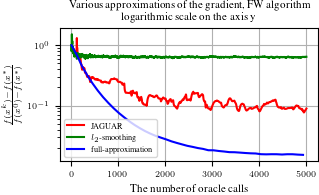

In [610]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_L2")

## Stochastic OPF-TPF FW LogReg on L2-ball

In [587]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 1
sett = L2Ball(radius=0.5)
L = 5.25

args = init_experiment(func_name, d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [588]:
def learning_rate(k):
    return 1 / L

In [589]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 273.06it/s]


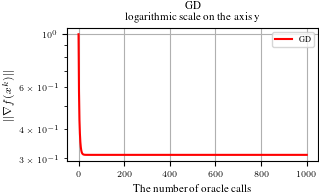

0.4999999999999999


In [590]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [596]:
def learning_rate_jaguar_opf(k):
    return 1 / (k + 10)

def learning_rate_jaguar_tpf(k):
    return (10 * np.sqrt(k) + 1) / (3 * k + 6)

In [597]:
def momentum_k_opf(k):
    return 2 * k / (2 * k + 100)

def momentum_k_tpf(k):
    return 0.9 * k / (k + 10)

In [598]:
oracle_opf = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)
oracle_tpf = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [599]:
Jaguar_opf = JaguarApproximator(oracle_opf, momentum_k=momentum_k_opf, gamma=1e-5)
Jaguar_tpf = JaguarApproximator(oracle_tpf, momentum_k=momentum_k_tpf, gamma=1e-5)

approx_list = [Jaguar_opf, Jaguar_tpf]
lr_list = [learning_rate_jaguar_opf, learning_rate_jaguar_tpf]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████| 2445/2445 [01:08<00:00, 35.85it/s]


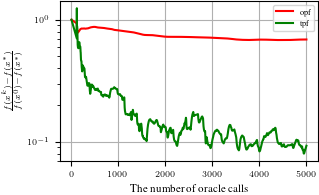

In [601]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_TPF_FW_LogReg_L2", labels=["opf", "tpf"])

## Stochastic OPF FW Reg on L2-ball

In [611]:
func_name = "quadratic"
d = 112
seed = 101
sigma = 1
sett = L2Ball(radius=0.5)
L = 1000
mu = 1

args = init_experiment(func_name, d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [612]:
def learning_rate(k):
    return 1 / L

In [617]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|████████████████████████████████| 100000/100000 [00:03<00:00, 32866.88it/s]


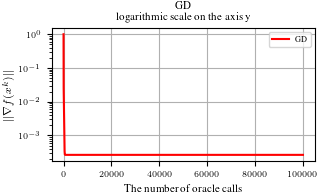

0.49999999999999994


In [618]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [747]:
def learning_rate_jaguar(k):
    return 1 / (k + 3)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [748]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [749]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [753]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 892/892 [01:22<00:00, 10.78it/s]


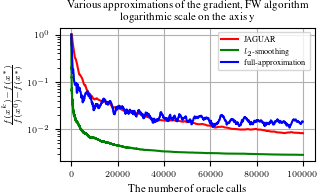

In [754]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_Reg_L2")

## Stochastic TPF FW Reg on L2-ball

In [755]:
func_name = "quadratic"
d = 112
seed = 101
sigma = 1
sett = L2Ball(radius=0.5)
L = 1000
mu = 1

args = init_experiment(func_name, d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [756]:
def learning_rate(k):
    return 1 / L

In [757]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|████████████████████████████████| 100000/100000 [00:03<00:00, 25628.35it/s]


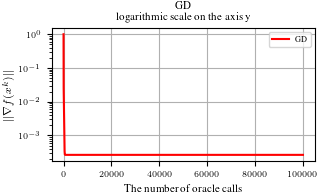

0.49999999999999994


In [758]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [759]:
def learning_rate_jaguar(k):
    return 1 / (k + 3)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [760]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [761]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [762]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 892/892 [00:40<00:00, 22.15it/s]


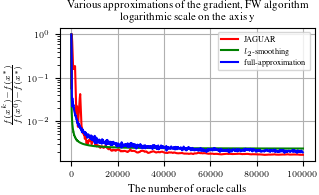

In [763]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_Reg_L2")

## Stochastic OPF-TPF FW Reg on L2-ball

In [764]:
func_name = "quadratic"
d = 112
seed = 101
sigma = 1
sett = L2Ball(radius=0.5)
L = 1000
mu = 1

args = init_experiment(func_name, d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [765]:
def learning_rate(k):
    return 1 / L

In [766]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 8335.30it/s]


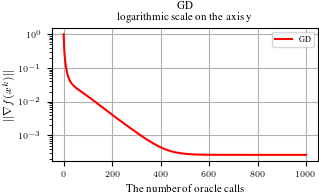

0.5


In [767]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [773]:
def learning_rate_jaguar_opf(k):
    return 1 / (k + 3)

def learning_rate_jaguar_tpf(k):
    return 1 / (k + 3)

In [774]:
def momentum_k_opf(k):
    return 0.95 * k / (k + 10)

def momentum_k_tpf(k):
    return 0.95 * k / (k + 10)

In [775]:
oracle_opf = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)
oracle_tpf = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [778]:
Jaguar_opf = JaguarApproximator(oracle_opf, momentum_k=momentum_k_opf, gamma=1e-5)
Jaguar_tpf = JaguarApproximator(oracle_tpf, momentum_k=momentum_k_tpf, gamma=1e-5)

approx_list = [Jaguar_opf, Jaguar_tpf]
lr_list = [learning_rate_jaguar_opf, learning_rate_jaguar_tpf]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████| 49945/49945 [00:24<00:00, 2070.45it/s]


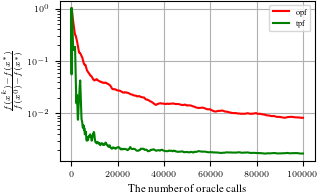

In [779]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_TPF_FW_Reg_L2", labels=["opf", "tpf"])